**VueJs**: Framework Js phát triển web phía giao diện, ra mắt 2014. Là sự kết hợp của angular và react.

**Mục lục**  
- [**Cài đặt môi trường**](#cài-đặt-môi-trường)
- [**Thành phần cơ bản**](#thành-phần-cơ-bản)
- [**Khác**](#khác)
- [**Pinia**](#pinia)


### **Cài đặt môi trường**
Lệnh tạo dự án với vue phiên bản mới nhất :`npm create vue@latest`  
Lệnh cài đặt thư viện: `npm i`  
Lệnh chạy ứng dụng chế độ dev: `npm run dev`  
*Cài đặt môi trường và chạy thành công*  
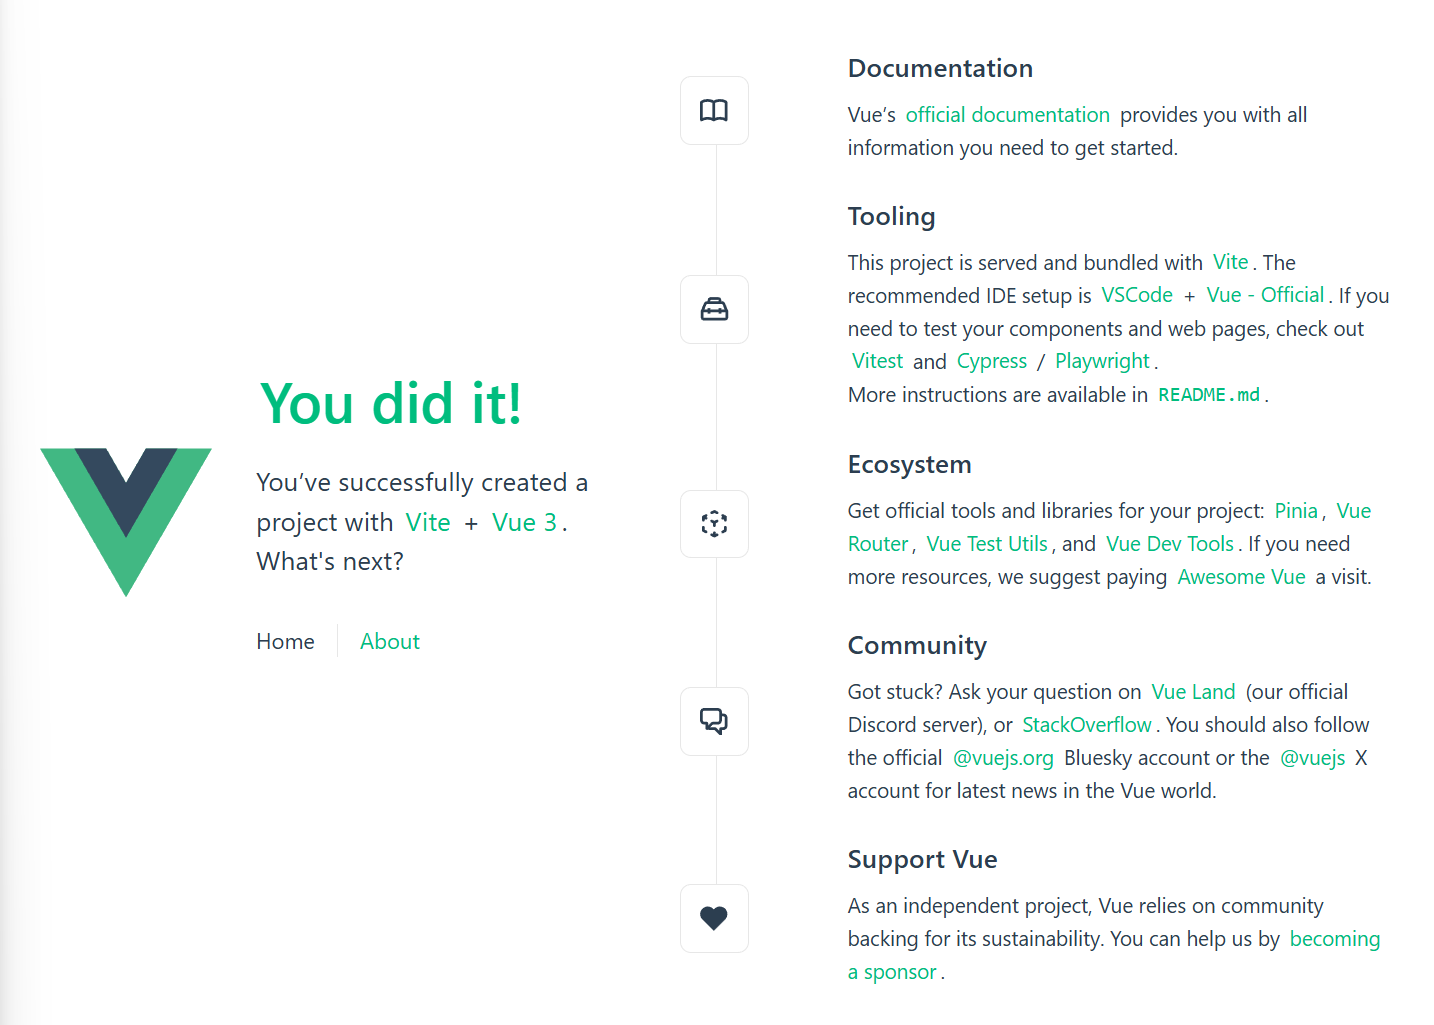  
*Helloworld*  
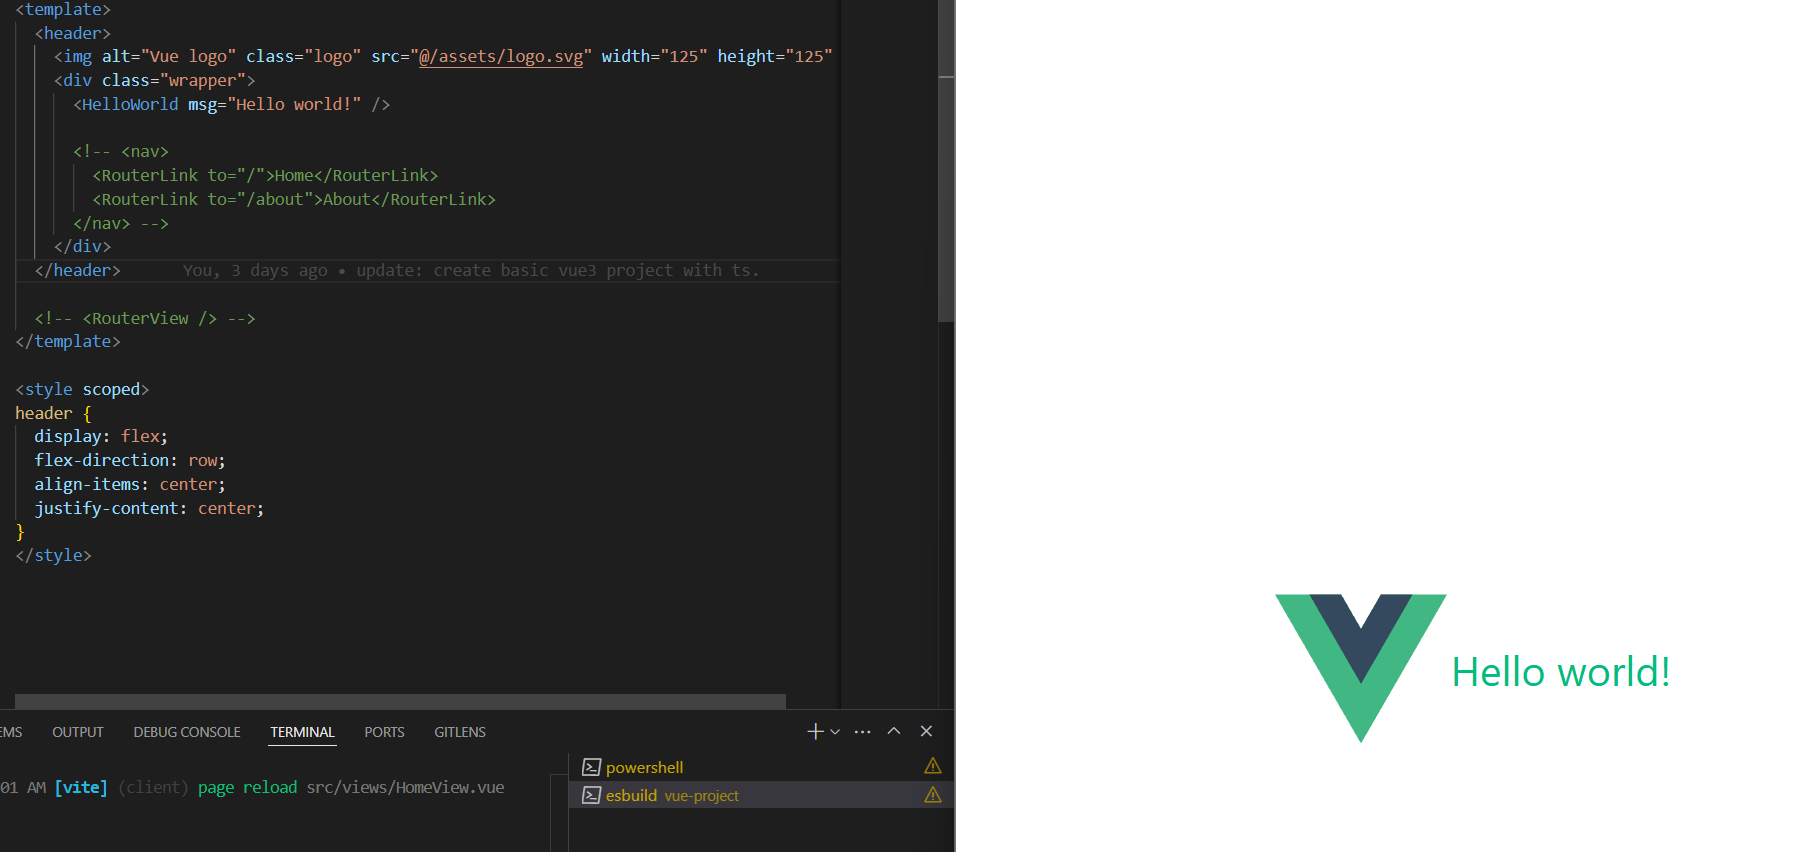  
### **Thành phần cơ bản**
**Attribute Binding:** Cách liên kết các thuộc tính html với dữ liệu trong component.  
*Cú pháp cơ bản:*  
```html
    <img :src="imageUrl" :class="myclass" alt="Ảnh sản phẩm" />
    <!-- hoặc -->
    <img v-bind:src="imageUrl" v-bind:class="myclass" />

    <script>
        // ....
        export default {
            data() {
                return {
                    myclass: "class1 class2"
                }
            }
            }
    </script>
```  
*Cú pháp binding nhiều thuộc tính 1 lần:*  
```html
    <div v-bind="cus_attributes"> </div>

    <script>
        // ...
        export default {
            data() {
                return {
                cus_attributes: {
                    id: 'cus_id',
                    class: 'cus_class',
                    'data-role': 'container'
                }
                }
            }
            }
    </script>
```  

**Conditional Rendering && List Rendering:** Render có điều kiện  
*Các directive được cung cấp*:
`v-if`  `v-else-if` `v-else`   
*Demo sử dụng else if để hiển thị*  
```html
<script>
export default {
  data() {
    return {
      myValue: ''
    }
  },
  computed: {
    numberValue() {
      return Number(this.myValue);
    }
  }
}
</script>

<template>
  <main>
    <div class="p-4 bg-gray-50 border border-gray-100 flex flex-col gap-4">
      <span :class="myclass"> {{ myValue ? `Số đã nhập là: ${myValue}` : "This is home content!" }}</span>

      <span v-if="numberValue > 150">Không có người nào lớn hơn 1000 tuổi</span>
      <span v-else-if="numberValue > 50">Hơn 50 tuổi, chào bác</span>
      <span v-else-if="myValue !== ''">Chào chú</span>

      <input v-model="myValue" class="px-3 p-2 border border-gray-300" type="number"
        placeholder="Bạn bao nhiêu tuổi ?" />
    </div>
  </main>
</template>
```   
*Kết quả hiển thị*  
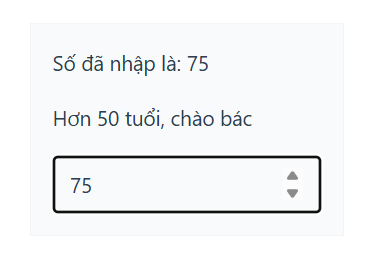  

*Render list với `v-for`*  
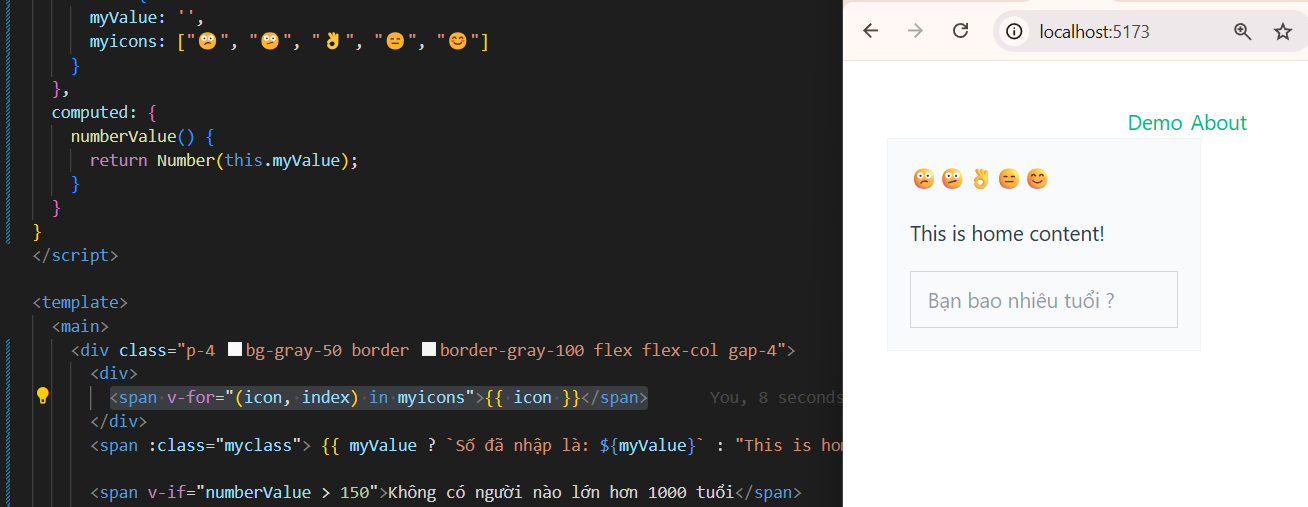  
Cú pháp: `<span v-for="(icon, index) in myicons">`  
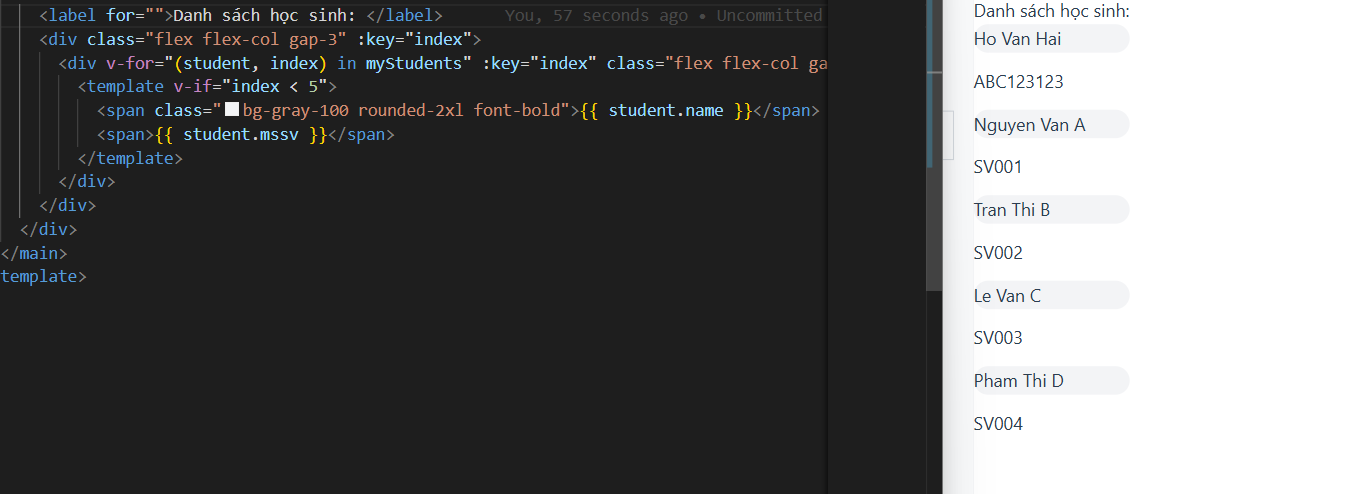  



**Event Handling:** Xử lý sự kiện với `v-on`  
```html
<template>
  <button v-on:click="handleClick">Click</button>
</template>

<script setup>
import { ref } from 'vue';

const message = ref('Hello Vue!');

const handleClick = () => {
  alert(message.value);
  message.value = 'Button clicked!'; 
};
</script>
```  
*Demo xử lý sự kiện click vào icon*  
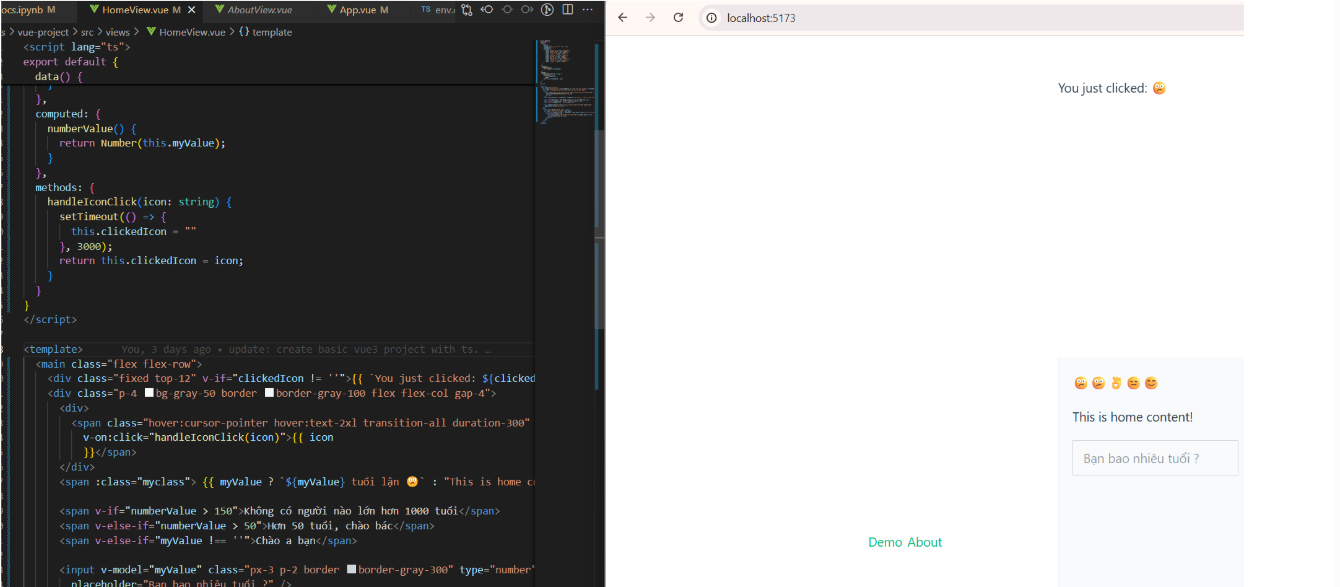  

**Component && Communicating Event**  
Component: thành phần tái sử dụng, bản thân nó chứa dữ liệu, logic và teplate của riêng nó.
*Cấu trúc 1 component*  
```html
<template></template>

<script></script>

<style></style>
```
Giao tiếp giữa các component cha-con  
Component con: đăng ký sự kiện với this.$emit(<nhãn sự kiện>, tham số)
Component cha: gọi sụ kiện bằng @<nhãn sụ kiện>="hàm thực hiện"  
*Nhận sự kiện ở component cha:*  
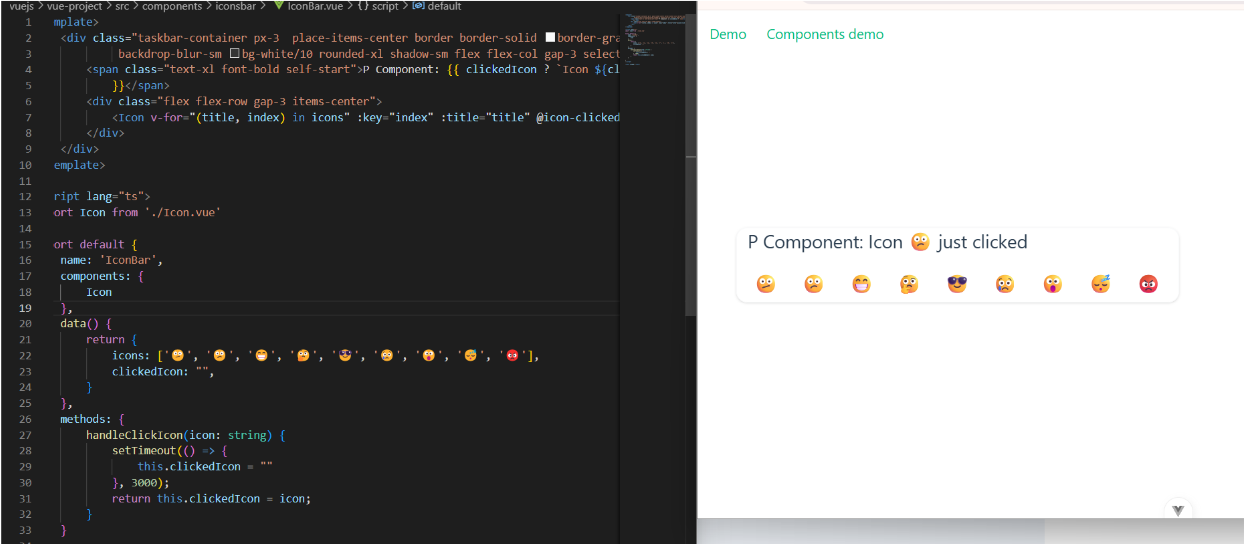  
*Bảng xử lý sự kiện DOM phổ biến*  
| Cú pháp                     | Mô tả                                             |
| --------------------------- | ------------------------------------------------- |
| `@click="handler"`          | Bắt sự kiện click                                 |
| `@dblclick="handler"`       | Double click                                      |
| `@mouseover="handler"`      | Di chuột vào                                      |
| `@mouseout="handler"`       | Di chuột ra                                       |
| `@keydown="handler"`        | Nhấn phím                                         |
| `@keyup="handler"`          | Nhả phím                                          |
| `@submit.prevent="handler"` | Gửi form (ngăn reload trang)                      |
| `@input="handler"`          | Khi có nhập dữ liệu vào input                     |
| `@change="handler"`         | Khi giá trị thay đổi (select, checkbox, radio...) |
| `@keydown.enter="handler"`  | Nhấn phím enter |
| `@dragstart` | Bắt đầu sự kiện kéo thẻ chuột trên phần tử |
| `@drag` | Phần tử đang được kéo thẻ |
| `@dragend` | Kết thúc sự kiện kéo thả |

**Reactivity** (tạo, cập nhật các biến reactive, sử dụng watch, computed, ...)   
Cho phép giao diện tự động cập nhật dữ liệu, không cần thao tác DOM thủ công. Là cách quản lý state của 1 component trong **Composition API**  
1. Tạo biến Reactive: `ref()` và `reactive()`  
- `ref()`: Hàm tạo 1 đối tượng reactive xung quang 1 giá trị, được sử dụng để tạo biến reactive. Đối tượng này để theo dõi các thay đổi, nên cần sử dụng .value để cập nhật giá trị, trong template, tự động được unwrap, không cần `.value`.
```html
<script>
import {ref} from 'vue';

const count = ref(0); // một rè được tạo với giá trị số
const user = ref({ // ref cho 1 đối tượng.
    name: "Hai",
    age: 22
})
// thay đổi giá trị với value (chỉ với value)
// Vì ref trả về 1 đối tượng, không phải 1 giá trị.
const changeValue() {
    count.value++;
    user.value = {
        name: "Hải",
        age: 23
    }
}
</script>
```  
- `reactive()`: Tương tự `ref`, tuy nhiên, reactive được thiết kế đặc biệt cho đối tương và mảng. không sử dụng value để truy cập hoặc thay đối thuộc tính của đối tượng reactive.  
```html
<script>
import {reactive} from "vue"

const laptop = reactive({
    name: "Lenovo",
    year: "2022"
})

const changeReactive() {
    laptop.name = "Lenovo IdeaPad"
}
</script>
```  
| ref | reactive |
| --- | -------- |
| Mọi loại giá trị. | Dùng cho đối tượng, mảng.  |
| Sử dụng `.value` để thay đổi giá trị | Không cần `.value` | 

- **`computed()`**: Tính toán các thuộc tính, cho phép định nghĩa các thuộc tính mà giá trị của chúng được tính toán dựa trên các dữ liệu reactive khác. Được tính toán lại khi các phụ thuộc của chúng thay đổi.  
```html
<script>
import {ref, computed} from "vue"

const price = ref(10000);
const quantity = ref(1200);

const totalPrice = computed(()=>{ // là 1 computed ref, Ref<number>
    return price.value + quantity.value; // ref thay đổi, computed được gọi lại
})

</script>
```
- **`watch()`**: Cho phép thực thi khi 1 hoặc nhiều nguồn ref thay đổi. Cần thiết khi thực hiện các hành động bất đồng bộ, side effect,...  
*Các tuỳ chọn*  

| Tuỳ chọn   | Giá trị | Chi tiết |
|-----------|---------|----------|
| immediate | true    | Chạy callback ngay lập tức khi watcher được tạo |
| deep      | true (default)   | Nếu đang watch một `ref` chứa object/mảng, `deep: true` cho phép lắng nghe các thay đổi bên trong |
| flush     | {`pre`, `post`, `sync`} | Chỉ định thời điểm gọi watcher (`pre`, `post`, `sync`) |  

```html
<script>
    import {ref, watch} from 'vue'
    const myObject = ref({
        a: 1,
        b: {
            c:2
        }
    })
    watch(myObject, (newValue, oldValue) => {
        console.log('Object change', newValue )
    }, {deep: true})
</script>
```  
Khi nào sử dụng `computed` và `watch`  
| Mục đích                            | `computed()`    | `watch()`                    |
| ----------------------------------- | -------------------- | --------------------------------- |
| Tính toán và trả về giá trị mới     | ✅       | ❌                 |
| Theo dõi và tương tác phụ | ❌                    | ✅                    |
| Theo dõi sâu (deep object/array)    | ❌  | ✅ `deep: true`          |
| Theo dõi nhiều biến một lúc         | ❌               | ✅  mảng `ref`  |
| Gọi API khi dữ liệu thay đổi        | ❌                    | ✅                      |



**Composition API (`<script setup>`)**: Tập hợp APIs cho phép soạn thảo logic trong 1 component, thay vì tổ chức code như các tuỳ chọn như Options APIs, COmposition tổ chức code theo tính năng.  
`<script setup>` là cải tiến cú pháp Composition apis. Sử dụng composition apis gọn gàng và hiệu quả hơn.  
*Minh hoạ tổ chức code với Composition apis*  
```html 
<script setup>
import { ref, reactive } from 'vue';

const count = ref(0); 
const message = ref('Vue 3!'); 

const user = reactive({ // reactive object
  name: 'Alice',
  age: 30
});

const products = ref([ // reactive objects array
  { id: 1, name: 'Laptop', price: 1200 },
  { id: 2, name: 'Keyboard', price: 75 }
]);
</script>
```

### **Kiến trúc mã nguồn, life cycle**
*Kiến trúc thư mục*  
vue-app/  
│  
├── public/                 # Thư mục tĩnh public         
│   └── favicon.ico  
│  
├── src/                   # Mã nguồn chính  
│   ├── assets/            # Tài nguyên: font, media,css,...  
│   ├── components/        # Component tái sử dụng (BaseButton, Navbar, ...)  
│   ├── composables/       # Các hàm logic dùng lại (Composition API)  
│   ├── views/             # Các trang chính  
│   ├── router/            # Cấu hình Vue Router  
│   ├── store/             # Pinia / Vuex (state management)  
│   ├── services/          # API call (sử dụng Axios, Fetch, ...)  
│   ├── types/             # Khai báo type TypeScript  
│   ├── App.vue            # Component gốc  
│   └── main.ts            # Điểm khởi đầu  
│  
├── index.html             # File HTML chính (dùng Vite)  
├── tsconfig.json          # Cấu hình TypeScript  
├── vite.config.ts         # Cấu hình Vite  
└── package.json           # Danh sách dependencies và scripts  

*Tổ chức component Composition API*  
```html
<template> // UI template
    <div>{{message}}</div>
</template>
<script setup lang='ts'>
    // Import
    import { onMounted } from 'vue'
    import { defineProps } from 'vue'
    import { useCartStore } from '@/store/cartStore'
    // Props, emits
    const props = defineProps<{
        user: {
            id: string,
            name: string,
            age: number | null,
        }
    }>()
    // reactive , ref
    const message = ref('')
    // functions
    function greetUser() {
        message.value = `Xin chào ${props.user.name}!`
        alert(message.value)
    }
    // LifeCycle Hooks
    onMounted(() => {
        console.log('Component đã mount với User:', props.user)
    })
</script>
<style scope>

</style>
```  
**Life Cycle**  
| Tên hàm               | Thời điểm gọi                                             |
| --------------------- | --------------------------------------------------------- |
| `onBeforeMount()`     | Ngay trước khi **mount**                                  |
| `onMounted()`         | Ngay sau khi **mount** xong                               |
| `onBeforeUpdate()`    | Trước khi cập nhật DOM                                    |
| `onUpdated()`         | Sau khi DOM cập nhật                                      |
| `onBeforeUnmount()`   | Trước khi component bị huỷ                                |
| `onUnmounted()`       | Sau khi component bị huỷ                                  |
| `onActivated()`       | Khi component được kích hoạt lại (dùng với `<KeepAlive>`) |
| `onDeactivated()`     | Khi component bị tạm dừng (KeepAlive)                     |
| `onErrorCaptured()`   | Khi component con bị lỗi runtime                          |
| `onRenderTracked()`   | [Debug] Gọi khi reactive được theo dõi                    |
| `onRenderTriggered()` | [Debug] Gọi khi reactive trigger update                   |


In [ ]:
<script setup lang="ts">
import {
  onMounted,
  onUpdated,
  onUnmounted,
  onErrorCaptured
} from 'vue'

onMounted(() => {
  console.log('Component đã được mount')
})

onUpdated(() => {
  console.log('Component đã cập nhật leen DOM')
})

onUnmounted(() => {
  console.log('Component bị huỷ')
})

onErrorCaptured((err, instance, info) => {
  console.error('Lỗi ở component con:', err)
})
</script>


### **Khác:**
**Vue routing && Navigation**  
Vue cung cấp thư viện chính thức `vue-router`, cho phép chuyển đổi các trang không cần reload toàn bộ trình duyệt.  
Mỗi router được cấu hình là 1 bản ghi route (**route record**),
Triển khai rout trong vue (index.ts): param, lazy loading,..

```ts
// src/router/index.ts
import { createRouter, createWebHistory, RouteRecordRaw } from 'vue-router'

// Eager loading (tải ngay khi import)
import HomeView from '@/view/HomeView.vue'

// Lazy loading (component chỉ tải khi cần thiết)
const AboutView = () => import('@/view/AboutView.vue')
const DashboardLayout = () => import('@/layout/DashboardLayout.vue')
const DashboardHome = () => import('@/view/dashboard/DashboardHome.vue')
const DashboardSettings = () => import('@/view/dashboard/DashboardSettings.vue')
const UserProfile = () => import('@/view/UserProfile.vue')
const NotFound = () => import('@/view/NotFound.vue')

const routes: RouteRecordRaw[] = [
  // Trang chính
  {
    path: '/',
    name: 'Home',
    component: HomeView
  },

  // Trang About - lazy loaded
  {
    path: '/about',
    name: 'About',
    component: AboutView
  },

  // Route có params: /user/123
  {
    path: '/user/:id',
    name: 'UserProfile',
    component: UserProfile,
    props: true, // truyền route param thành props
    meta: {myGuard: true} // navigation guard 
  },

  // Nested routes (dashboard với layout riêng)
  {
    path: '/dashboard',
    component: DashboardLayout,
    children: [
      {
        path: '',
        name: 'DashboardHome',
        component: DashboardHome
      },
      {
        path: 'settings',
        name: 'DashboardSettings',
        component: DashboardSettings
      }
    ]
  },

  // Redirect route
  {
    path: '/home',
    redirect: '/'
  },

  // Route 404 - bắt tất cả
  {
    path: '/:pathMatch(.*)*',
    name: 'NotFound',
    component: NotFound
  }
]

const router = createRouter({
  history: createWebHistory(),
  routes,
  scrollBehavior() {
    return { top: 0 }
  }
})

export default router


```

**Navigation guard**  
```ts
router.beforeEach((to, from) => {
  // instead of having to check every route record with
  // to.matched.some(record => record.meta.myGuard)
  if (to.meta.myGuard && !auth.isLoggedIn()) {
    // this route requires auth, check if logged in
    // if not, redirect to login page.
    return {
      path: '/login',
      // save the location we were at to come back later
      query: { redirect: to.fullPath },
    }
  }
})
```
| API                              | Thời điểm gọi                                                        | Mô tả                                                |
| -------------------------------- | -------------------------------------------------------------------- | ---------------------------------------------------- |
| `router.beforeEach(to, from)`    | Trước khi chuyển route                                               | Dùng để chặn hoặc redirect trước khi đi đến route    |
| `router.beforeResolve(to, from)` | Sau tất cả `beforeEach` & route guards, trước khi hiển thị component | Thường dùng để đợi async logic                       |
| `router.afterEach(to, from)`     | Sau khi route hoàn tất                                               | Không thể chặn điều hướng – dùng để log hoặc cleanup |
  

**Pre-Route Guard**  
```ts
const routes = [
  {
    path: '/users/:id',
    component: UserDetails,
    beforeEnter: (to, from) => {
      // reject the navigation
      return false
    },
  },
]
```



**Navigation:**  
```ts
import { useRouter } from 'vue-router'

const router = useRouter()
// literal string path
router.push('/users/eduardo')

// object with path
router.push({ path: '/users/eduardo' })

// named route with params to let the router build the url
router.push({ name: 'user', params: { username: 'eduardo' } })

// with query, resulting in /register?plan=private
router.push({ path: '/register', query: { plan: 'private' } })

// with hash, resulting in /about#team
router.push({ path: '/about', hash: '#team' })
```



**Axios && API CALL**  
*Call api bằng axios*  
```ts
// Gọi apu thông thường
const fetchData = async ()=>{
    try {
        const response = await axios.get('http://api.example.com/users');
        

        // ................
    } catch(err: any) {
        // ................
    }
}
// Bổ sung header, ví dụ cần bổ sung token vào req.
const getData = async ()=>{
    try {
        const res = await axios.get("http://.........", {
            headers: {
                Authrization: `Bearer ${token}`
            }
        })
    } catch(eror: any) {
        // ...............
    }
}

```

**Authentication và Authorization**  
*Xác thực và uỷ quyền*  
- Authentication - Xác thực: Xác nhận danh tính (Quá trình đăng nhập)  
- Authorization - Uỷ quyền: Cấp quyền truy cập, xảy ra sau Authentication (Sau khi Hệ thống xác thực thành công).  
Sẽ làm rõ trong NestJs - BE  

**VueJs v3 - Typescript**  
- *typescript trong composition api*: `setup lang='ts'`  
- *File cấu hình typescript dược chia nhỏ trong vue* :  
Nhằm tách biệt môi trường: App và vite config
```json
// tsconfig.json - quản lý đa cấu hình
// tính năng Project References liên kết các cấu hình con.
{
  "files": [],
  "references": [
    {
      "path": "./tsconfig.node.json"
    },
    {
      "path": "./tsconfig.app.json"
    }
  ]
}
//tsconfig.node.json
// Vite plugin
{
  "extends": "@tsconfig/node22/tsconfig.json",
  "include": [
    "vite.config.*",
    "vitest.config.*",
    "cypress.config.*",
    "nightwatch.conf.*",
    "playwright.config.*",
    "eslint.config.*"
  ],
  "compilerOptions": {
    "noEmit": true,
    "tsBuildInfoFile": "./node_modules/.tmp/tsconfig.node.tsbuildinfo",

    "module": "ESNext",
    "moduleResolution": "Bundler",
    "types": ["node"]
  }
}

// tsconfig.app.json
// Cấu hình cho ứng dụng vue 
{
  "extends": "./tsconfig.base.json",
  "compilerOptions": {
    "composite": true,
    "types": ["vite/client"]
  },
  "include": ["src"]
}


```



### **Pinia**
*Thư viện quản lý trạng thái của VueJs, được thiết kế giúp viêc chia sẻ dữ liệu giữa các component trở nên hiệu quả hơn, thường duoc95 cấu hình trong `stores/`*  
| Thành phần | Mục đích |
| -- | -- |
| State | Định nghĩa biến dùng chung trong ứng dụng |
| Actions | Xử lys logic, gọi API, cập nhật state |
| Getters | Tạo computed từ **state** |
| Modules | Tách store thành nhiêu phần nhỏ |

